In [5]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

<h3>Data reshaping and sampling<h3>

In [6]:
df = pd.read_csv("breast-cancer-wisconsin.csv", sep=';')
# display(df.head())
# print(len(df))       
        
for i in range(0,len(df)):
    if df.iat[i, 10] == 2:
        df.iat[i, 10] = 0
    else:
        df.iat[i, 10] = 1
        
for i in range(0, len(df)):
    if df.iat[i, 10] != 1 and df.iat[i, 10] != 0:
        print(df.iloc[i, 10])

ytrain = df["Column11"].to_numpy()

df = df.drop(["Column1", "Column7", "Column11"], axis=1)

xtrain = df.to_numpy()

xtrain, ytrain = shuffle(xtrain, ytrain, random_state=0)

feature_train, feature_test, target_train, target_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

sc = StandardScaler()
feature_train = sc.fit_transform(feature_train)
feature_test = sc.transform(feature_test)

tensor_xtrain = torch.FloatTensor(feature_train) 
tensor_ytrain = torch.FloatTensor(target_train) 

<h3> Model building<h3>

In [7]:
model = torch.nn.Sequential(
    torch.nn.Linear(8, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
    torch.nn.Sigmoid())

In [8]:
loss = torch.nn.BCELoss() 
 
optimizer = torch.optim.Adam(model.parameters()) 

<h3> Model training<h3>

In [9]:
def train_session(X, y, classifier, criterion, optimizer, n_epochs=10000): 
    losses = np.zeros(n_epochs)        
    
    for iter in range(n_epochs): 
        optimizer.zero_grad() 
        yPred = classifier(X)         
        loss = criterion(yPred.squeeze(), y) 
        losses[iter] = loss.item() 
        loss.backward() 
        optimizer.step() 
           
    return losses

losses = train_session(tensor_xtrain, tensor_ytrain, model, loss, optimizer)

<h3> Model evaluation<h3>

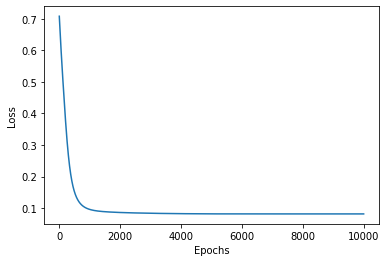

In [10]:
import matplotlib.pyplot as plt 
plt.plot(np.arange(0, losses.shape[0]), losses)
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.show() 

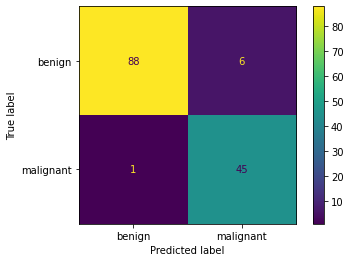

In [11]:
tensor_xtest = torch.FloatTensor(feature_test) 

predictions = np.round(model(tensor_xtest).squeeze().detach().numpy(), 0)
cm = confusion_matrix(target_test, predictions)
class_names=["benign", "malignant"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()